In [1]:
import os,shutil

In [21]:
orgiginal_dataset_dir=r'D:\dogs-vs-cats\train'
base_dir=r'C:\Users\박정은\OneDrive - 고려대학교\삽질\파이썬\data'

In [9]:
os.mkdir(base_dir)

In [10]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [11]:
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [12]:
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [13]:
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [23]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [24]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [25]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [27]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [31]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [30]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(orgiginal_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [32]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [33]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [34]:
from keras import optimizers

In [35]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [39]:
train_generator=train_datagen.flow_from_directory(
train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [40]:
validation_generator=train_datagen.flow_from_directory(
validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [42]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 95s 948ms/step - loss: 0.6889 - acc: 0.5415 - val_loss: 0.7001 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 89s 892ms/step - loss: 0.6608 - acc: 0.6120 - val_loss: 0.6276 - val_acc: 0.5120
Epoch 3/30
100/100 [==============================] - 90s 899ms/step - loss: 0.6156 - acc: 0.6635 - val_loss: 0.7639 - val_acc: 0.5910
Epoch 4/30
100/100 [==============================] - 88s 876ms/step - loss: 0.5841 - acc: 0.6900 - val_loss: 0.6289 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 89s 895ms/step - loss: 0.5406 - acc: 0.7365 - val_loss: 0.8370 - val_acc: 0.6180
Epoch 6/30
100/100 [==============================] - 90s 898ms/step - loss: 0.5061 - acc: 0.7540 - val_loss: 0.6463 - val_acc: 0.7090
Epoch 7/30
100/100 [==============================] - 88s 877ms/step - loss: 0.4850 - acc: 0.7650 - val_loss: 0.6390 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 8

In [43]:
model.save('cats_and_dogs_small_1.h5')

In [44]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [45]:
epochs=range(1,len(acc)+1)

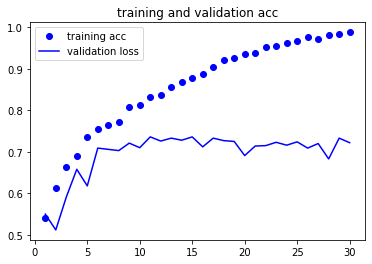

In [49]:
plt.figure()
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation loss')
plt.title('training and validation acc')
plt.legend()
plt.show()

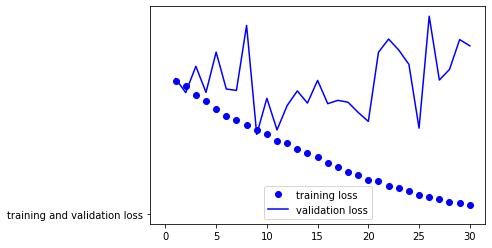

In [47]:
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.plot('training and validation loss')
plt.legend()
plt.show()

In [51]:
datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [52]:
from keras.preprocessing import image

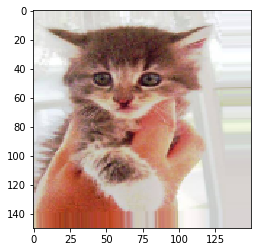

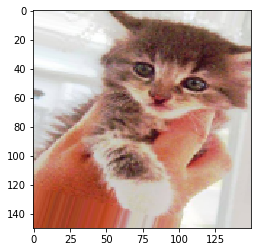

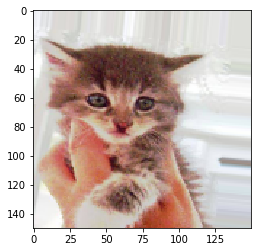

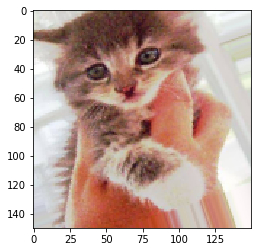

In [59]:
fnames=sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [60]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [62]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [63]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [71]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [67]:
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [72]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 0.6310 - acc: 0.6270 - val_loss: 0.6840 - val_acc: 0.6497
Epoch 2/30
100/100 [==============================] - 101s 1s/step - loss: 0.6220 - acc: 0.6480 - val_loss: 0.5774 - val_acc: 0.6927
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.6149 - acc: 0.6590 - val_loss: 0.6424 - val_acc: 0.6675
Epoch 4/30
100/100 [==============================] - 101s 1s/step - loss: 0.6038 - acc: 0.6635 - val_loss: 0.6864 - val_acc: 0.6978
Epoch 5/30
100/100 [==============================] - 99s 986ms/step - loss: 0.5864 - acc: 0.6870 - val_loss: 0.5423 - val_acc: 0.6942
Epoch 6/30
100/100 [==============================] - 119s 1s/step - loss: 0.5891 - acc: 0.6820 - val_loss: 0.5601 - val_acc: 0.6778
Epoch 7/30
100/100 [==============================] - 117s 1s/step - loss: 0.5860 - acc: 0.6855 - val_loss: 0.7984 - val_acc: 0.7081
Epoch 8/30
100/100 [==============================] - 109s 1s/step 

In [73]:
model.save('cats_and_dogs_small_2.h5')

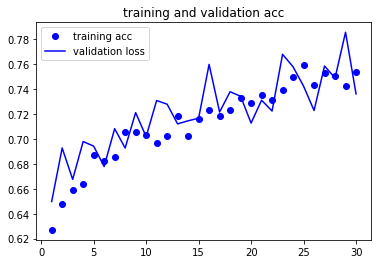

In [74]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation loss')
plt.title('training and validation acc')
plt.legend()
plt.show()

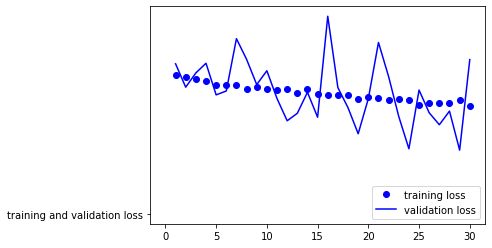

In [76]:
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.plot('training and validation loss')
plt.legend()
plt.show()